In [1]:
import pystan as st
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import edward as ed
import numpy as np
import tensorflow as tf

# Model 8.2 in Stan

In [2]:
model_code = """
data {
    int<lower=0> N;
    int y[N];
}
parameters {
    real<lower=0,upper=1> theta;
}
model {
    theta ~ beta(1,1) ;
    y ~ bernoulli(theta) ;
}
"""
model = st.StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2b1fc2ba37ac1d59cb69bdd0bcab7452 NOW.


In [3]:
N = 50
z = 10
data = dict(N=N, y=[1]*z + [0]*(N-z))
fit = model.sampling(data=data, iter=5000, warmup=1000, chains=3)

In [4]:
fit.extract()['lp__']

array([-26.88706489, -27.78944672, -26.95514957, ..., -27.71047795,
       -26.83182236, -26.94962681])

In [5]:
sample_data = fit.extract(permuted=False, inc_warmup=False)

/Users/lbrinkm/projects/doing_bayesian_da/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  """Entry point for launching an IPython kernel.


In [6]:
sample_data.shape

(4000, 3, 2)

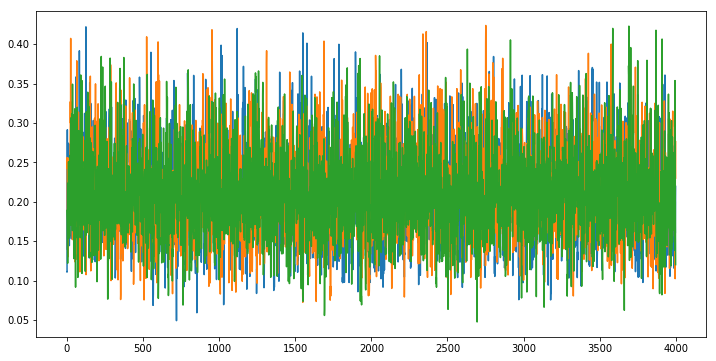

In [7]:
plt.close('all')
fig = plt.figure(figsize=[12, 6])
for sd in sample_data.swapaxes(0,1):
    plt.plot(sd[:,0])
plt.show()

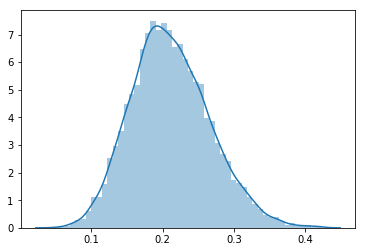

In [8]:
plt.close('all')
sns.distplot(sample_data[:,:,0].flatten())
plt.show()

# Model 8.2 in Edward

In [32]:
theta = ed.models.Beta(1.0, 1.0)
x = ed.models.Bernoulli(probs=theta, sample_shape=50)
q_theta = ed.models.Empirical(tf.Variable(tf.zeros(5000)))
#q_theta = ed.models.Gamma(concentration=tf.Variable(tf.ones(1000)), rate=tf.Variable(tf.ones(1000)))

In [33]:
N = 50
z = 10
x_data = np.array([1]*z + [0]*(N-z))

inference = ed.Gibbs({theta: q_theta}, data={x: x_data})

In [ ]:
inference.run()

5000/5000 [100%] ██████████████████████████████ Elapsed: 1158s | Acceptance Rate: 1.000

In [13]:
y_post = ed.copy(x, {theta: q_theta})

In [30]:
w_samples = q_theta.sample(10000)

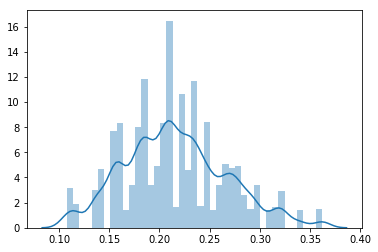

In [31]:
plt.close('all')
sns.distplot(w_samples.eval())
plt.show()

In [23]:
q_theta

<ed.RandomVariable 'Empirical/' shape=() dtype=float32>